# Good product analysis
1. Data Preprocess
2. Generate recommendations for each feature

In [1]:
# import libraries 
import numpy as np 
import pandas as pd  
dataBrandDetails = pd.read_csv('data/BrandDetails.csv')

In [2]:
dataBrandDetails.head(2)

,State,Channel,Category L1,Category L2,Category L3,Category L4,Category L5,Brand,Product Description,Total Sales ($),...,Total THC,Total CBD,Contains CBD,Pax Filter,Strain,Is Flavored,Mood Effect,Generic Vendor,Generic Items,$5 Price Increment
0,California,Licensed,Inhaleables,Flower,Hybrid,NaN,NaN,#BlackSeries,#BlackSeries - Vanilla Frosting - Flower (Gram),"1,103.964857",...,0,0,THC Only,NaN,Vanilla Frosting,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$10.00 to $14.99
1,California,Licensed,Inhaleables,Flower,Hybrid,NaN,NaN,#BlackSeries,#BlackSeries - Vanilla Frosting - Flower (Gram),674.645211,...,0,0,THC Only,NaN,Vanilla Frosting,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$15.00 to $19.99


In [3]:
dataBrandDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144977 entries, 0 to 144976
Data columns (total 25 columns):
State                  144977 non-null object
Channel                144977 non-null object
Category L1            144977 non-null object
Category L2            144977 non-null object
Category L3            144245 non-null object
Category L4            102618 non-null object
Category L5            50135 non-null object
Brand                  144977 non-null object
Product Description    144977 non-null object
Total Sales ($)        144977 non-null object
Total Units            144977 non-null object
ARP                    144977 non-null float64
Flavor                 7807 non-null object
Items Per Pack         144977 non-null int64
Item Weight            64454 non-null object
Total THC              144977 non-null object
Total CBD              144977 non-null object
Contains CBD           144977 non-null object
Pax Filter             44301 non-null object
Strain              

# 1. Data preprocessing
- Drop State and Channel
- Convert Total Sales, TotalUnits
- ARP binning

In [4]:
dataBrandDetails = dataBrandDetails.drop(['State','Channel','Brand'], axis=1)

In [5]:
# dataBrandDetails['Total Sales ($)'].head()
dataBrandDetails['Total Sales ($)'] = dataBrandDetails['Total Sales ($)'].str[:10].apply(lambda x: x.replace(',', '') )
dataBrandDetails['Total Sales'] = pd.to_numeric(dataBrandDetails['Total Sales ($)'])
dataBrandDetails = dataBrandDetails.drop('Total Sales ($)', axis=1)
# dataBrandDetails['Total Sales'].head()

dataBrandDetails['Total Units'] = dataBrandDetails['Total Units'].str[:15].apply(lambda x: x.replace(',', '').split('.')[0] )
dataBrandDetails['Total Units'] = pd.to_numeric(dataBrandDetails['Total Units'])

In [6]:
binning_list = [5*i for i in range(10)]+[10*i for i in range(5,11)]+[np.inf]
labe_list=[]
for i in range(len(binning_list)-1):
    labe_list.append(str(binning_list[i]) + '-' + str(binning_list[i+1]))
dataBrandDetails['ARP category'] = pd.cut(dataBrandDetails['ARP'], 
                                         bins=binning_list,
                                         labels = labe_list)

In [124]:
binning_list

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, inf]

In [9]:
dataBrandDetails = dataBrandDetails.drop('ARP', axis=1)

In [11]:
dataBrandDetails['ARP category'].value_counts()

25-30      15124
20-25      14992
15-20      14922
30-35      14547
10-15      13415
35-40      12857
5-10       12500
50-60      11028
40-45      10143
45-50       7982
0-5         6870
60-70       5317
70-80       2511
80-90       1486
90-100       898
100-inf      384
Name: ARP category, dtype: int64

In [12]:
dataBrandDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144977 entries, 0 to 144976
Data columns (total 22 columns):
Category L1            144977 non-null object
Category L2            144977 non-null object
Category L3            144245 non-null object
Category L4            102618 non-null object
Category L5            50135 non-null object
Product Description    144977 non-null object
Total Units            144977 non-null int64
Flavor                 7807 non-null object
Items Per Pack         144977 non-null int64
Item Weight            64454 non-null object
Total THC              144977 non-null object
Total CBD              144977 non-null object
Contains CBD           144977 non-null object
Pax Filter             44301 non-null object
Strain                 115639 non-null object
Is Flavored            11287 non-null object
Mood Effect            144977 non-null object
Generic Vendor         144977 non-null object
Generic Items          144977 non-null object
$5 Price Increment     

# Classify Good or general product


- Plot `Total Sales` distribution
- Split data into three part by `Total Sales`
- Find conditional probabilty 

In [15]:
dataBrandDetails.describe()

,Total Units,Items Per Pack,Total Sales
count,1.449770e+05,144977.000000,1.449770e+05
mean,1.493555e+03,1.938259,2.022486e+04
std,3.878860e+04,17.294108,3.083281e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,1.500000e+01,0.000000,4.255229e+02
50%,5.700000e+01,0.000000,1.619633e+03
75%,2.880000e+02,0.000000,7.114693e+03
max,1.130090e+07,1000.000000,8.040090e+07


In [16]:
dataBrandDetails.isnull().sum()

Category L1                 0
Category L2                 0
Category L3               732
Category L4             42359
Category L5             94842
Product Description         0
Total Units                 0
Flavor                 137170
Items Per Pack              0
Item Weight             80523
Total THC                   0
Total CBD                   0
Contains CBD                0
Pax Filter             100676
Strain                  29338
Is Flavored            133690
Mood Effect                 0
Generic Vendor              0
Generic Items               0
$5 Price Increment          0
Total Sales                 0
ARP category                1
dtype: int64

# 2. Evaluate better choice for each feature

- See how `score` labels looks like
- Pick out features to be evaluate
- Compute the best `n` features by `Total Sales` using conditional probability
- Generate a dataFrame that give the top `n` recommendation for each feature

## 2.1 how `score` labels looks like
- how total sales distributed
- how sales were labeled

Saving figure Total Sales distribution.png


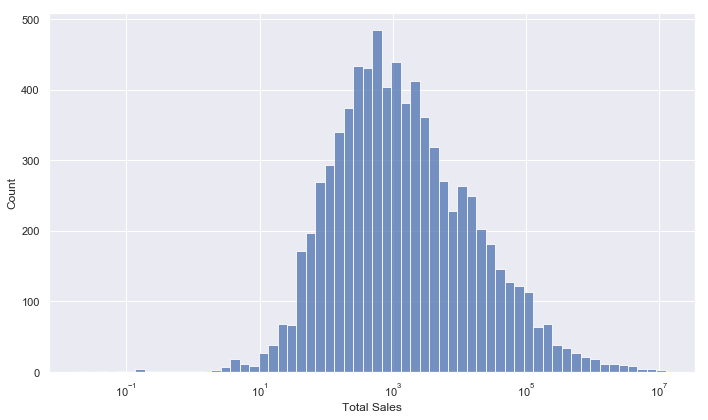

In [118]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
sns.histplot(data=dataBrandDetails.loc[:, ["Total Sales",'Flavor']].dropna(), x="Total Sales", log_scale=True)

save_fig('Total Sales distribution.png')

In [120]:
dataBrandDetails['score'] = pd.qcut(dataBrandDetails['Total Sales'], 3, labels=["bad","medium", "good"])

Saving figure Total Sales distribution labeled.png


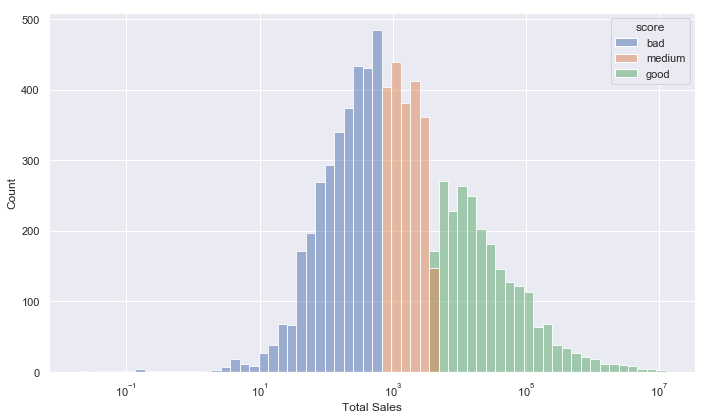

In [121]:
sns.histplot(data=dataBrandDetails.loc[:, ["Total Sales",'Flavor']].dropna(), 
             x="Total Sales", log_scale=True, hue = dataBrandDetails['score'])
save_fig('Total Sales distribution labeled.png')

In [ ]:
data

## 2.2 Pick out features to be evaluate

In [26]:
dataBrandDetails.columns

Index(['Category L1', 'Category L2', 'Category L3', 'Category L4',
       'Category L5', 'Product Description', 'Total Units', 'Flavor',
       'Items Per Pack', 'Item Weight', 'Total THC', 'Total CBD',
       'Contains CBD', 'Pax Filter', 'Strain', 'Is Flavored', 'Mood Effect',
       'Generic Vendor', 'Generic Items', '$5 Price Increment', 'Total Sales',
       'ARP category'],
      dtype='object')

In [53]:
feature_list = ['Category L1', 'Category L2', 'Category L3', 'Category L4', 'Category L5','Flavor',
       'Items Per Pack', 'Item Weight', 'Total THC', 'Total CBD',
       'Contains CBD', 'Pax Filter', 'Strain', 'Is Flavored', 'Mood Effect',
       'Generic Vendor', 'Generic Items', '$5 Price Increment',
       'ARP category']

## 2.3 Evaluate each picked features using conditional probabilty
- Build recommedation dataFrame and outperformance score dataFrame

In [93]:
import matplotlib.pyplot as plt
def evaluation(feature, top_n_category):
    Xy_temp_df = dataBrandDetails.loc[: , [feature, 'Total Sales']].dropna()
    Xy_temp_df['score'] = pd.qcut(Xy_temp_df['Total Sales'], 3, labels=["bad","medium", "good"])
    
    total = len(Xy_temp_df)/3
    category_count = len(dataBrandDetails[feature].value_counts())
    
    feature_good_df = Xy_temp_df[Xy_temp_df['score']=='good'][feature].value_counts()/total
    feature_med_df = Xy_temp_df[Xy_temp_df['score']=='medium'][feature].value_counts()/total
    feature_bad_df = Xy_temp_df[Xy_temp_df['score']=='bad'][feature].value_counts()/total
    
    
    df = pd.DataFrame({'Good': feature_good_df,
                      'Medium': feature_med_df,
                      'Bad': feature_bad_df,
                      'Average odds':1/category_count},index= feature_med_df.index)
    df['Out performance'] = (df["Good"]-df["Bad"])/ ((df["Good"]+df["Bad"])/2)
    df_sorted = df.sort_values('Good', ascending=False).iloc[:top_n_category]
    df_sorted.plot.bar()
    return df_sorted
    
#     plt.show()

deal with Category L1
deal with Category L2
deal with Category L3
deal with Category L4
deal with Category L5
deal with Flavor
deal with Items Per Pack
deal with Item Weight
deal with Total THC
deal with Total CBD
deal with Contains CBD
deal with Pax Filter
deal with Strain
deal with Is Flavored
deal with Mood Effect
deal with Generic Vendor
deal with Generic Items
deal with $5 Price Increment
deal with ARP category


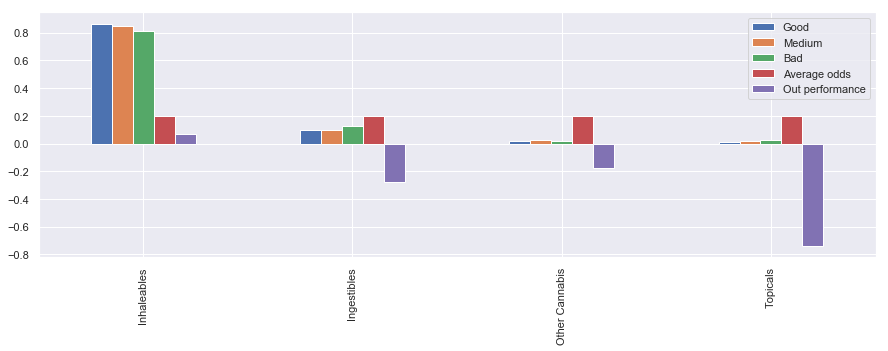

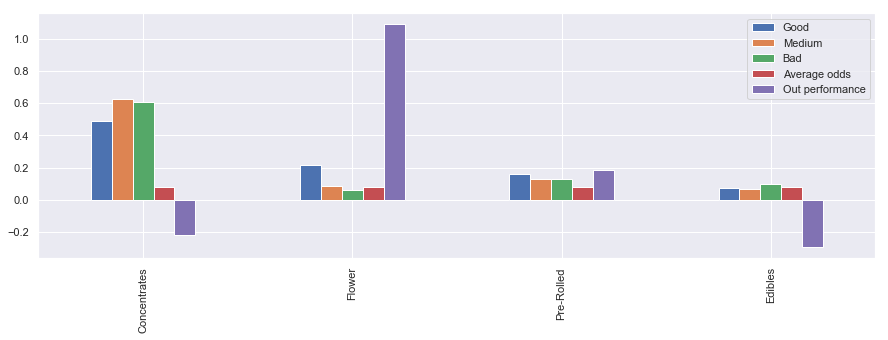

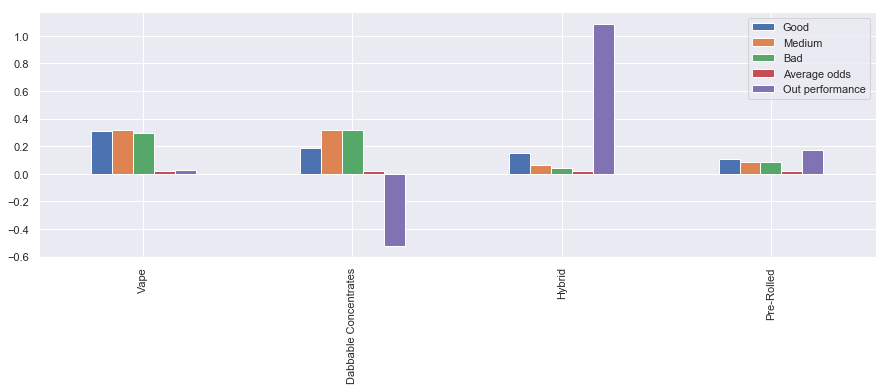

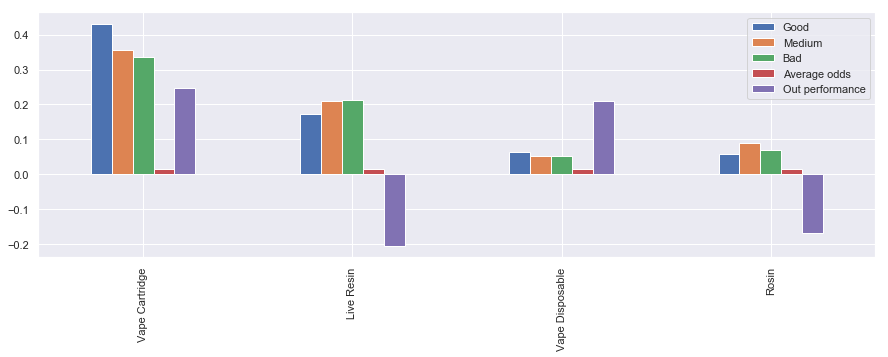

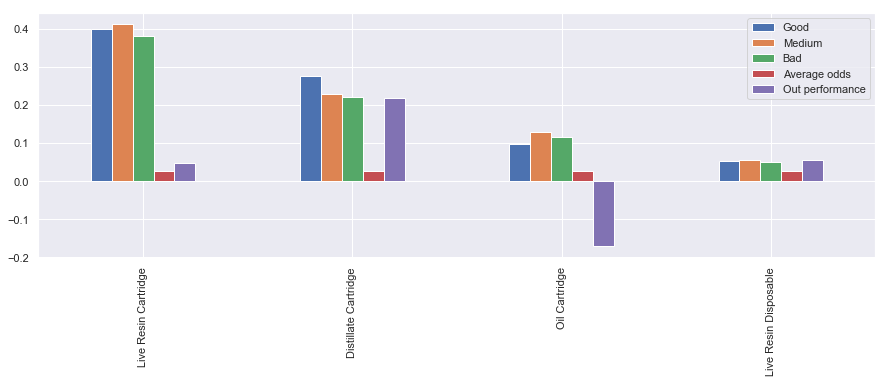

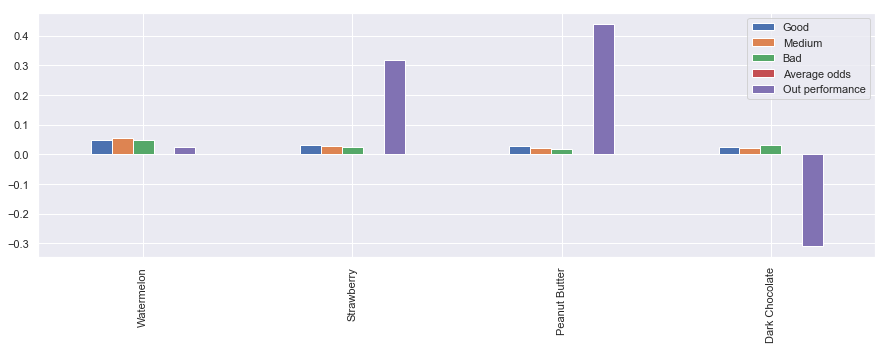

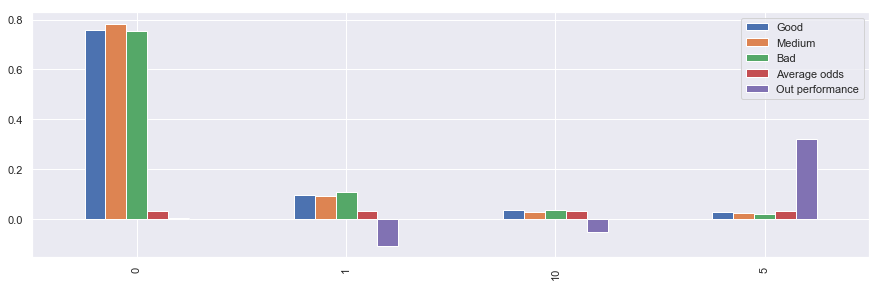

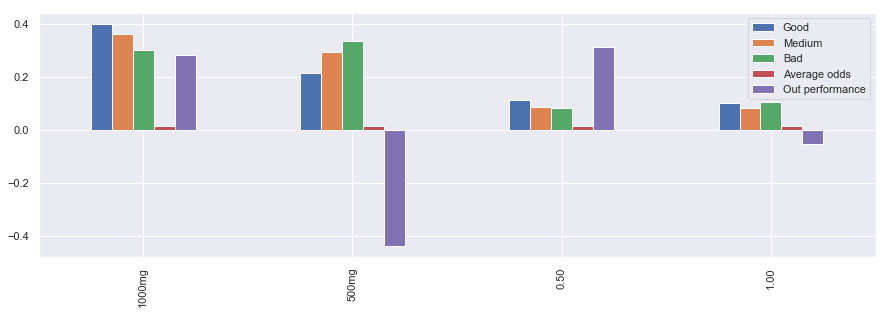

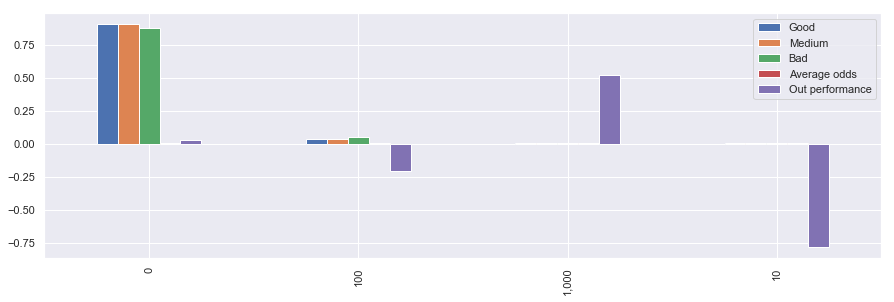

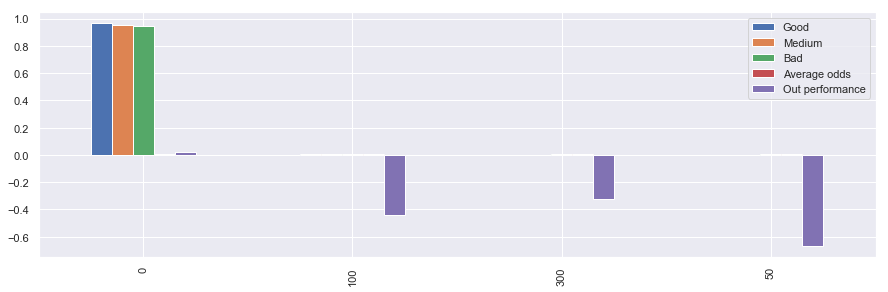

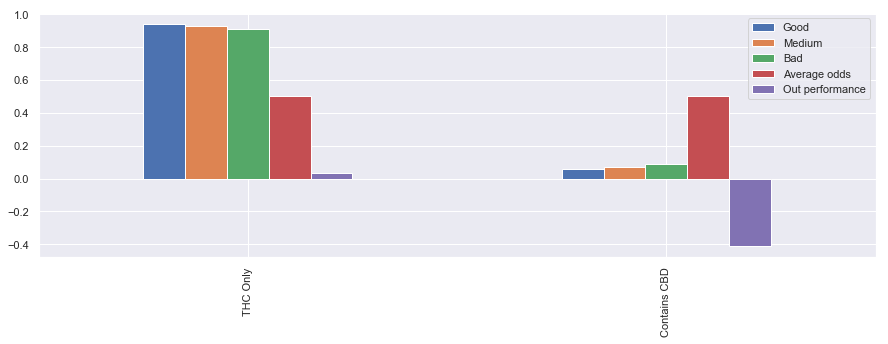

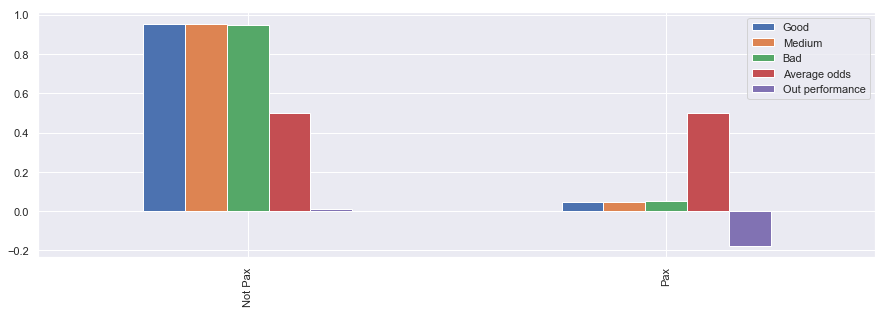

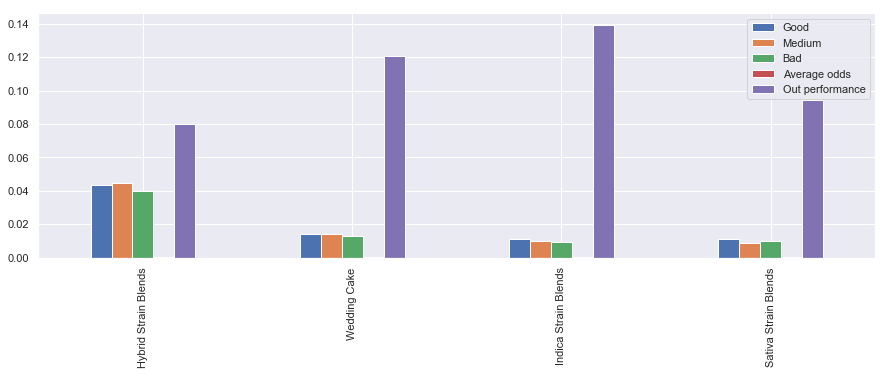

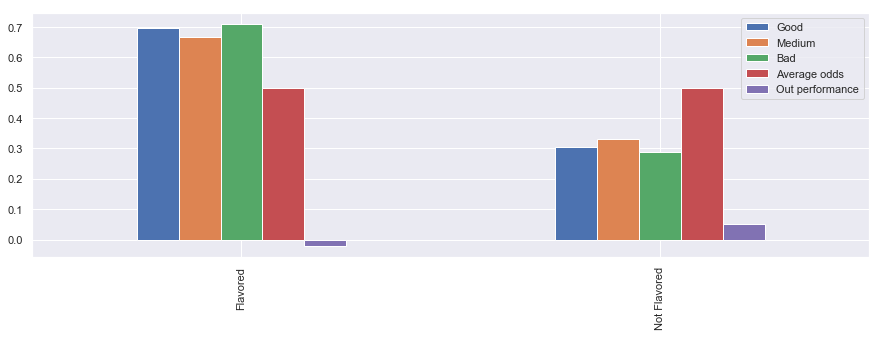

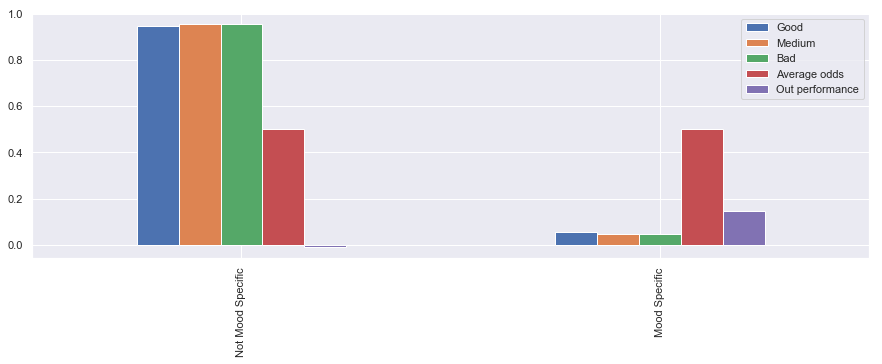

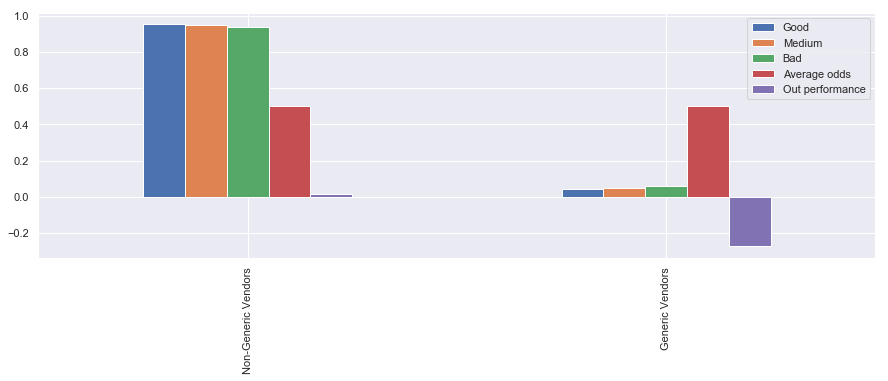

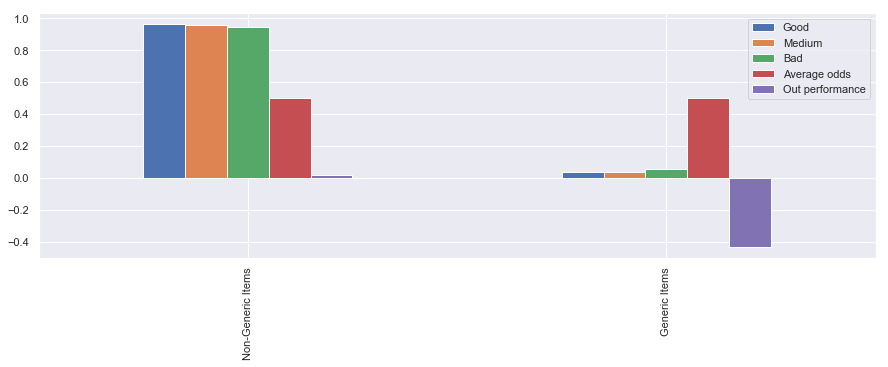

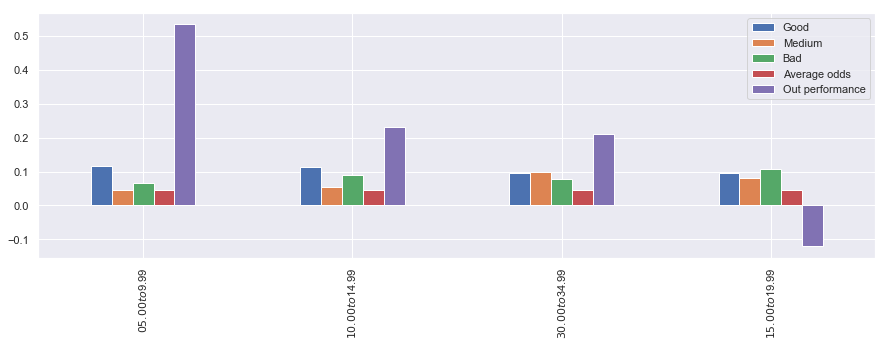

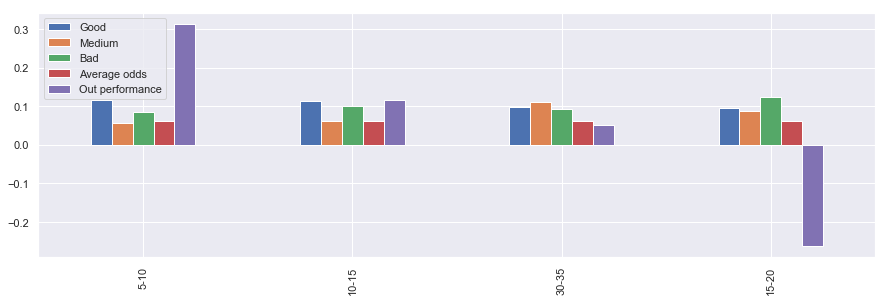

In [133]:
feature_recommendation_df = pd.DataFrame(columns=feature_list)
feature_recommendation_score_df = pd.DataFrame(columns=feature_list)
feature_market_occ_df = pd.DataFrame(columns=feature_list)
top_n_cat = 4
for feature in feature_list:
    print('deal with', feature)
    res_df = evaluation(feature, top_n_cat)
    
    feature_recommendation_df[feature] = pd.Series(res_df.index, index=[i for i in range(len(res_df))])
    feature_market_occ_df[feature] = pd.Series(res_df['Good'].values, index=[i for i in range(len(res_df))])
    feature_recommendation_score_df[feature] = pd.Series(res_df['Out performance'].values, index=[i for i in range(len(res_df))])

In [77]:
res_df

,Good,Medium,Bad,Average odds,Out performance
5-10,0.116730,0.056844,0.085090,0.0625,NaN
10-15,0.113977,0.062121,0.101500,0.0625,NaN
30-35,0.097754,0.110439,0.092829,0.0625,NaN
15-20,0.095809,0.088215,0.124759,0.0625,NaN


In [95]:
# feature_recommendation_score_df['ARP category'] = pd.Series((res_df["Good"]-res_df["Bad"])/res_df["Average odds"])
feature_recommendation_score_df

,Category L1,Category L2,Category L3,Category L4,Category L5,Flavor,Items Per Pack,Item Weight,Total THC,Total CBD,Contains CBD,Pax Filter,Strain,Is Flavored,Mood Effect,Generic Vendor,Generic Items,$5 Price Increment,ARP category
0,0.068108,-0.220551,0.029280,0.247099,0.046882,0.023904,0.002409,0.282710,0.029798,0.022222,0.032793,0.009190,0.080050,-0.021530,-0.007600,0.015434,0.020486,0.534748,0.313545
1,-0.275561,1.092424,-0.522992,-0.205203,0.218374,0.317241,-0.108380,-0.439813,-0.206312,-0.441989,-0.412360,-0.176833,0.120805,0.050224,0.145084,-0.273431,-0.430034,0.232492,0.115817
2,-0.180085,0.187863,1.089670,0.209950,-0.171396,0.440678,-0.050558,0.313035,0.521379,-0.325581,NaN,NaN,0.139417,NaN,NaN,NaN,NaN,0.210439,0.051683
3,-0.739380,-0.291330,0.170562,-0.168508,0.056680,-0.309859,0.321050,-0.055708,-0.778443,-0.666667,NaN,NaN,0.094527,NaN,NaN,NaN,NaN,-0.121175,-0.262501


In [125]:
feature_recommendation_df
feature_recommendation_df.to_csv('feature_recommendation_df.csv')

Saving figure Factor Analysis Heatmap.png


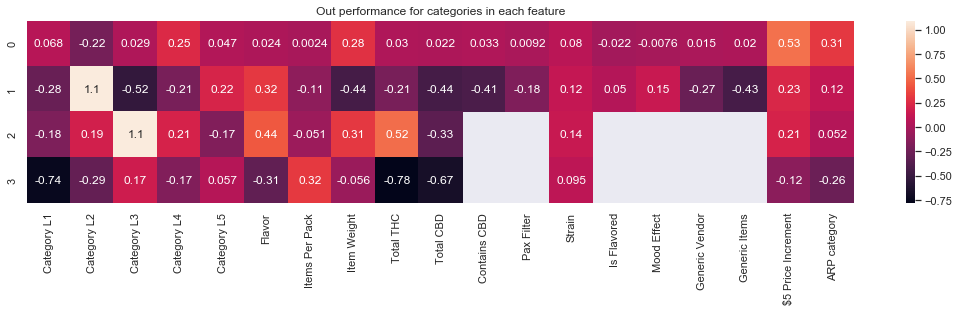

In [135]:
sns.set(rc={'figure.figsize':(15,4.5)})
sns.heatmap(feature_recommendation_score_df, annot=True).set_title('Out performance for categories in each feature')
save_fig('Factor Analysis Heatmap.png')

Saving figure Market share by feature values.png


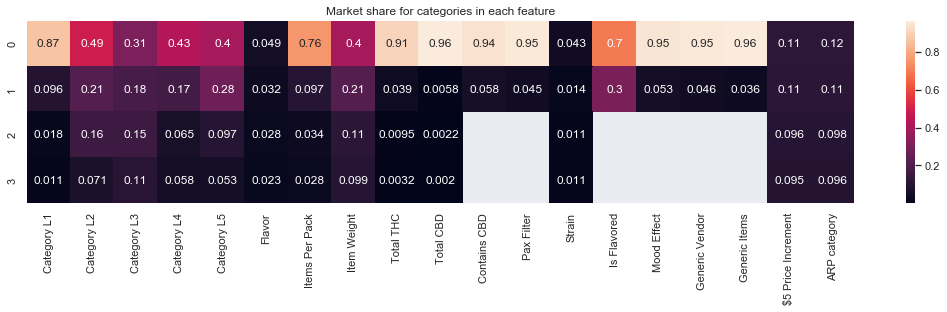

In [136]:
sns.set(rc={'figure.figsize':(15,4.5)})
sns.heatmap(feature_market_occ_df, annot=True).set_title('Market share for categories in each feature')
save_fig('Market share by feature values.png')

In [112]:
# Helper function allowing you to export a graph
import os
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)